In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('all_data.csv')

In [5]:
data.head(5)
data.shape

(186850, 6)

## Cleaning the data

### Here we are droping the NAN values


In [6]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.dropna(how='all',inplace=True)

In [8]:
data.shape

(186305, 6)

In [9]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Here we want to calculate total sales but the columns are in string format so first changing data type.

In [10]:
data=(data[data['Product'].str[0:2]!='Pr'])


In [11]:
data.reset_index(drop=True,inplace=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [12]:
data['Price Each']=pd.to_numeric(data['Price Each'])
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])
data['Month']=data['Order Date'].str[0:2]
data['Month']=pd.to_numeric(data['Month'])
data.dtypes


Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [13]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


# Q-1 What was the highest Selling Month and hou much is the amount? 

In [14]:
data['Sales']=data['Quantity Ordered']*data['Price Each']

In [15]:
Months=pd.DataFrame(data.groupby(['Month']).sum()['Sales'])
Months.reset_index(inplace=True)


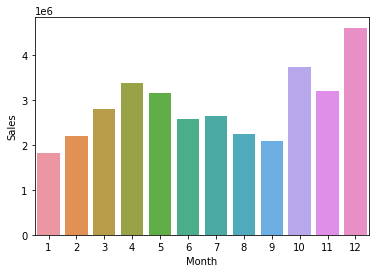

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Month',y='Sales',data=Months);


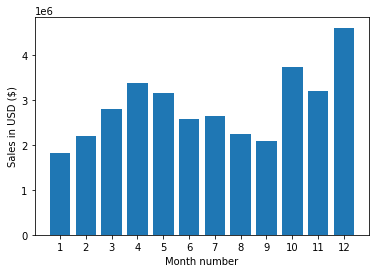

In [17]:
plt.bar(Months['Month'],Months['Sales'])
plt.xticks(Months['Month'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


#  Q-2 Which City has highest sales?

In [18]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]



In [19]:
data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [20]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [21]:
cities=data.groupby(['City'])['Sales'].sum()
cities.keys()

Index(['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)',
       'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)',
       'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)'],
      dtype='object', name='City')

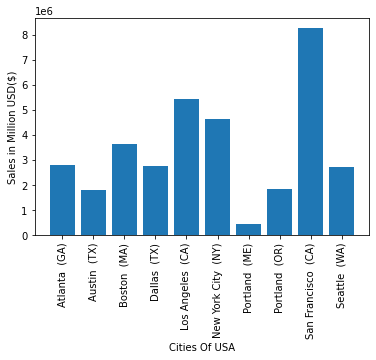

In [22]:
plt.bar(cities.keys(),cities)
plt.xticks(rotation='vertical')

plt.xlabel('Cities Of USA')
plt.ylabel('Sales in Million USD($)')
plt.show()

# Q-3 What was best time for company to advertisement their product?

In [23]:
# here first we have to convert order date in datetime type,
data['Order Date']=pd.to_datetime(data['Order Date'])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [24]:
## Now Spliting Hour and Min using dt function.
data['Hour']=pd.to_datetime(data['Order Date']).dt.hour
data['Min']=pd.to_datetime(data['Order Date']).dt.minute
hours=data.Hour.value_counts(sort=False)
hours

0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Hour, dtype: int64

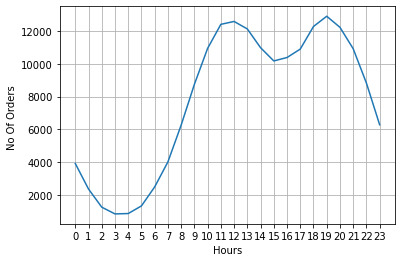

In [25]:
plt.plot(hours.keys(),hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('No Of Orders ')
plt.xticks(hours.keys())
plt.show()

# Q-4 What product sold the most? Why do you think it sold the most?

In [43]:
products =data.groupby(['Product'])['Quantity Ordered'].sum()
products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

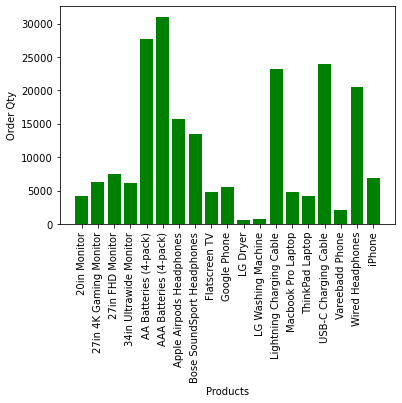

In [51]:
plt.bar(products.keys(),products,color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Order Qty')
plt.show()

In [49]:
## Here we got the name of product whose got sold highest but to find the reason 
#we need to plot co relationn between product price and order qty sold.
Prices=data.groupby(['Product'])['Price Each'].mean()
Prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-57-dbb99f4c5b8d>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


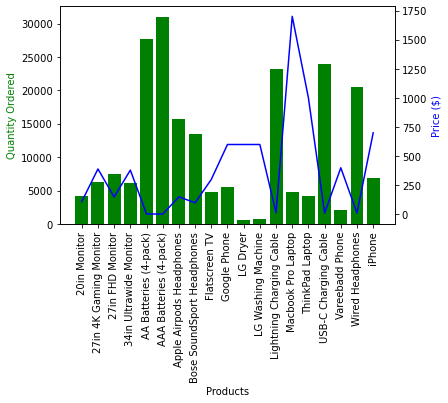

In [57]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products.keys(),products ,color='g')
ax2.plot(products.keys(),Prices, color='b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products.keys(),rotation='vertical',)

fig.show()